# CREDIT CARD - FRAUD DETECTION 

###### Description - 
###### Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
#conda install -c conda-forge imbalanced-learn

In [2]:
#pip install imblearn -U

In [24]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn import svm, tree, linear_model
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve

from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingRegressor
import seaborn as sns
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [4]:
df=pd.read_csv("CC.csv")

In [5]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Class: The actual classfication classes (0 = Normal transaction, 1 = Fraud)

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142404.000000,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###### We proceed since there are no null values

In [7]:
print ('The number of normal transactions : ' + str(sum(df.Class == 0)))
print ('The number of frauds : ' + str(sum(df.Class == 1)))
print ('The percentage of fraud of all transactions : ' + str(float(sum(df.Class == 1))/float(len(df.Class))*100.0))

The number of normal transactions : 284315
The number of frauds : 492
The percentage of fraud of all transactions : 0.1727485630620034


#### Since the sample size of one of the classification group is so less (0.17%) compared to the other class, we need to Oversample the minority class and balance the data. We will apply the oversampling technique to the data set during prediction process

Text(0, 0.5, 'Frequency')

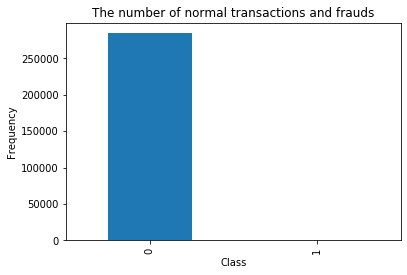

In [8]:
pd.value_counts(df['Class'], sort=True).plot(kind='bar')
plt.title('The number of normal transactions and frauds')
plt.xlabel('Class')
plt.ylabel('Frequency')

Text(0, 0.5, 'Euro')

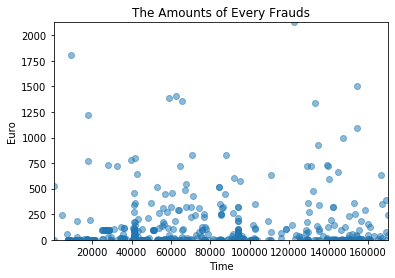

In [9]:
figsize=(6,6)
plt.scatter(df['Time'][df.Class==1], df['Amount'][df.Class==1], alpha=0.5)
plt.margins(0)
plt.title('The Amounts of Every Frauds')
plt.xlabel('Time')
plt.ylabel('Euro')

### Finding if the features have a correlation amongst themselves which might influence the prediction accuracy

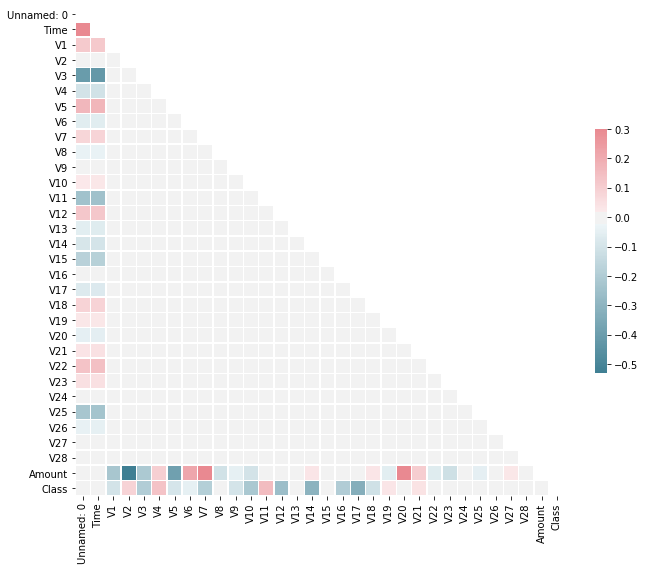

In [10]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Since V1 , V2...V28 are a result of PCA and also in the Correlation matrix , we don't see any relation amongst the features, we are going to go ahead with these features

## Scaling the data

In [11]:
df.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [12]:
X = df[['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount']]
Y = df['Class']

In [13]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [14]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [15]:
print ('The number of transactions after resampling : ' + str(len(X)))

The number of transactions after resampling : 568630


##### the number of sample size has increased because of oversampling of the Minority class

## Now Splitting the data into Train and Test Datasets

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [21]:
AlFx = [
    linear_model.LogisticRegressionCV(),
    GaussianNB(),
    tree.DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1),
    KNeighborsClassifier(n_neighbors=3)
]

In [27]:
AlFx_columns = []
AlFx_compare = pd.DataFrame(columns = AlFx_columns)

row_index = 0
for alg in AlFx:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    fp, tp, th = roc_curve(Y_test, predicted)
    AlFx_name = alg.__class__.__name__
    AlFx_compare.loc[row_index,'AlFx_name'] = AlFx_name
    AlFx_compare.loc[row_index, 'Precision'] = precision_score(Y_test, predicted)
    AlFx_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    
    row_index+=1
AlFx_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
AlFx_compare

,AlFx_name,Precision,AUC
0,LogisticRegressionCV,0.986348,0.967284
4,KNeighborsClassifier,0.952474,0.965351
2,DecisionTreeClassifier,0.987085,0.960270
3,RandomForestClassifier,0.985815,0.934790
1,GaussianNB,0.994677,0.806766
